<a href="https://colab.research.google.com/github/chayvw18/LLN/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/2025

/content/drive/MyDrive/2025


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import  Axes3D

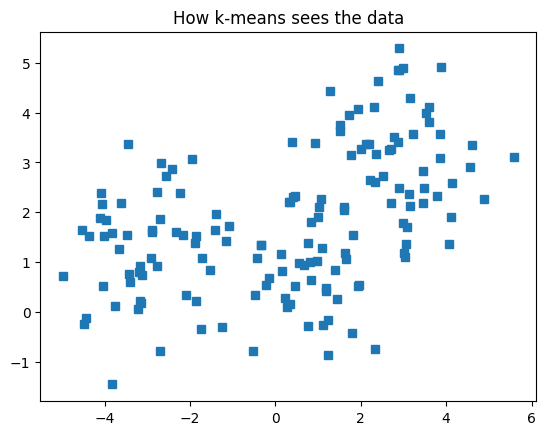

In [ ]:
##Create data

nPerClust = 50

#blur around centroid(std units) amount of variance around each central location
blur = 1

#XY centroid locations hard coded
A = [1,1]
B = [-3,1]
C = [3,3]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

#concatenate into a list
data = np.transpose(np.concatenate((a,b,c), axis=1))

#Show the data
plt.plot(data[:,0], data[:,1], 's')
plt.title('How k-means sees the data')
plt.show()

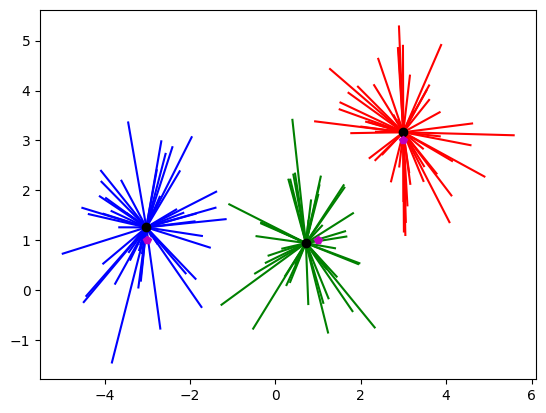

In [ ]:
## K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)

#group labels numerical label that tells us wether its in grp 0 1 2
groupidx = kmeans.predict(data)

#centriods
cents = kmeans.cluster_centers_

#draw lines from each data point to the centroid of each cluster
linecolors='rbgmrkbgm';
for i in range(0, len(data)):
  plt.plot([data[i,0], cents[groupidx[i],0] ] ,[ data[i,1],cents[groupidx[i],1] ],linecolors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

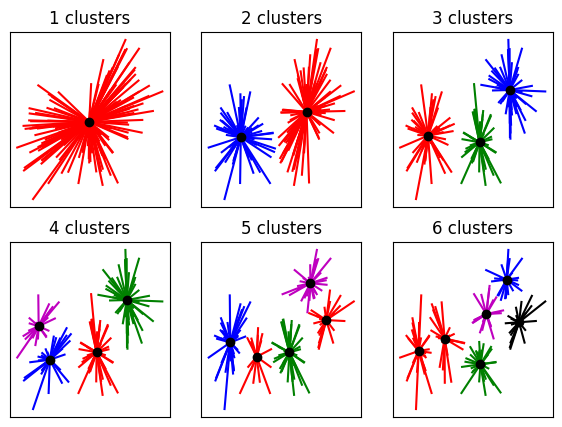

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
  kmeans = KMeans(n_clusters=k+1).fit(data)
  groupidx = kmeans.predict(data)
  cents = kmeans.cluster_centers_

  for i in range(0,len(data)):
    ax[k].plot([data[i,0], cents[groupidx[i],0]], [ data[i,1],cents[groupidx[i],1] ],linecolors[groupidx[i]])


  ax[k].plot(cents[:,0], cents[:,1], 'ko')
  ax[k].set_xticks([])
  ax[k].set_yticks([])
  ax[k].set_title('%g clusters' %(k+1))

#   fig,ax = plt.subplots(2,3,figsize=(7,5))
# ax = ax.flatten()

# for k in range(6):

#     kmeans = KMeans(n_clusters=k+1).fit(data)
#     groupidx = kmeans.predict(data)
#     cents = kmeans.cluster_centers_

#     # draw lines from each data point to the centroids of each cluster
#     for i in range(0,len(data)):
#         ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

#     # and now plot the centroid locations
#     ax[k].plot(cents[:,0],cents[:,1],'ko')
#     ax[k].set_xticks([])
#     ax[k].set_yticks([])
#     ax[k].set_title('%g clusters'%(k+1))

In [ ]:
## number of clusters (quantative)

In [ ]:
from sklearn.cluster import DBSCAN

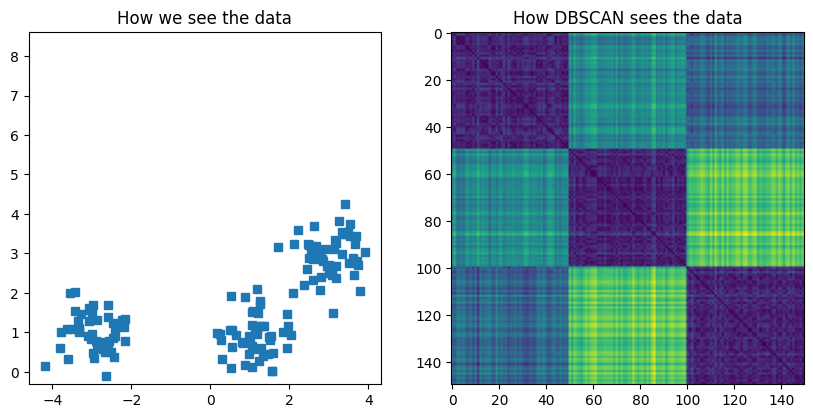

In [ ]:
#DBSCAN
##Create data

nPerClust = 50

#blur around centroid(std units) amount of variance around each central location
blur = .5

#XY centroid locations hard coded
A = [1,1]
B = [-3,1]
C = [3,3]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

#concatenate into a list
data = np.transpose(np.concatenate((a,b,c), axis=1))

#Show the data
fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].plot(data[:,0], data[:,1], 's')
ax[0].set_title('How we see the data')
ax[0].axis('square')

#Distance Matrix
D = np.zeros((len(data), len(data)))
for i in range(len(D)):
  for j in range(len(D)):
    D[i,j] = np.sqrt((data[i,0]-data[j,0])**2 +(data[i,1]-data[j,1])**2)

ax[1].imshow(D)
ax[1].set_title('How DBSCAN sees the data')
plt.show()

In [ ]:
#DBSCAN

clustmodel = DBSCAN(eps=.6, min_samples=6).fit(data)
groupidx = clustmodel.labels_
groupidx

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
value =1-(4/52)/(4/52)
value

0.0

In [ ]:
1-.07/.07

0.0